# Multi-class Image Classification with CNN using Tensorflow
---

<!-- Project Introduction -->
The purpose of this notebook is to build a Convolutional Neural Network (CNN) for predicting the class of an image.

<!-- About the data -->

---
<!-- Table of Contents -->

1. [Setup](#setup)
1. [Architecture](#define-model-architecture)
    1. [Baseline model](#baseline)
    1. [LeNet-5](#lenet-5)
    1. [ResNet](#resnet)
1. [Results](#plot-results)
1. [References](#references)

___

## Setup

In [20]:
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


## Load Dataset

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [22]:
print(
    f"Train samples: {x_train.shape[0]:,}",
    f"Test samples: {x_test.shape[0]:,}",
    sep="\n",
)

Train samples: 50,000
Test samples: 10,000


### Examples of images

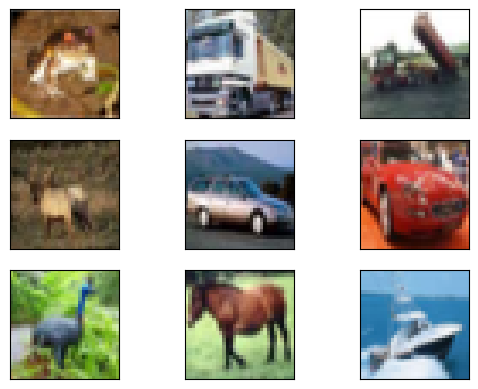

In [23]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

### Data Preprocessing

In [24]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define Model

### `Baseline`

A baseline model provides a minimum performance and serves as a reference point for future iterations on the network architecture.

Although any model can be used as a baseline, even the simplest one (`INPUT` -> `CONV` -> `POOL` -> `FLAT` -> `DENSE`), it is standard practice in Computer Vision to use one of the earliest architectures, such as VGG-16 which I'll be using. 

**VGG-16**

VGG-16 was developed by the Visual Geometry Group (VGG) at the University of Oxford and achieved strong performance on the [2014 ImageNet challenge](https://www.image-net.org/challenges/LSVRC/2014/results.php).

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(32, 32, 3)),
    keras.layers.Normalization(),
    keras.layers.Conv2D(32, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(32, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    # keras.layers.Conv2D(256, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    # keras.layers.Conv2D(256, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    # keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dense(4096, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dense(10, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 32, 32, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,502,001 (97.28 MB)

 Trainable params: 25,501,994 (97.28 MB)

 Non-trainable params: 7 (32.00 B)

#### Parameters

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
LEARING_RATE = 0.001
MOMENTUM = 0.9

In [ ]:
opt = keras.optimizers.SGD(learning_rate=LEARING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.3162 - loss: 1.8912 - val_accuracy: 0.5099 - val_loss: 1.3820
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5250 - loss: 1.3347 - val_accuracy: 0.5793 - val_loss: 1.1816
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6005 - loss: 1.1340 - val_accuracy: 0.6031 - val_loss: 1.1284
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6516 - loss: 0.9923 - val_accuracy: 0.6435 - val_loss: 1.0199
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.6986 - loss: 0.8667 - val_accuracy: 0.6493 - val_loss: 0.9981
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.7331 - loss: 0.7693 - val_accuracy: 0.6668 - val_loss: 0.9636
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.7690 - loss: 0.6701 - val_accuracy: 0.6898 - val_loss: 0.9324
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.8044 - loss: 0.5694 - 

#### Plot Results

In [52]:
def plot_results(model: keras.Model) -> None:
    """Generate resulting accuracy and loss plots for the trained model."""

    plt.subplots(1, 2, figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['accuracy'])
    plt.plot(model.history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xticks(range(0, NUM_EPOCHS+1, 5))
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xticks(range(0, NUM_EPOCHS+1, 5))
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()
    plt.show()

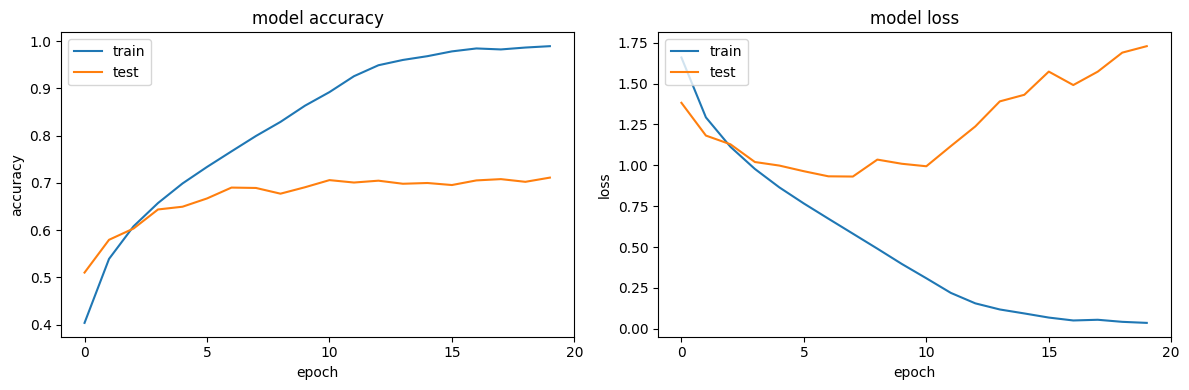

In [53]:
plot_results(model)

#### Commnents
- The baseline model achieves **~71% accuracy**.
- The model memorizes the training data towards the last epochs.
- It reaches its peak in test performance around the 6th-7th epoch after which the model performance quickly deteriorates.
- The increase in loss suggests significant over-fitting. 

### Introducing Dropout - `Baseline with Dropout`

In [56]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(32, 32, 3)),
    keras.layers.Normalization(),
    keras.layers.Conv2D(32, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(32, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(64, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    # keras.layers.Conv2D(256, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    # keras.layers.Conv2D(256, 3, activation="relu", kernel_initializer="he_uniform",padding="same"),
    # keras.layers.MaxPooling2D(),
    # keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4096, activation='relu', kernel_initializer="he_uniform"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 32, 32, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,502,001 (97.28 MB)

 Trainable params: 25,501,994 (97.28 MB)

 Non-trainable params: 7 (32.00 B)

#### Parameters

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
LEARING_RATE = 0.001
MOMENTUM = 0.9

In [59]:
opt = keras.optimizers.SGD(learning_rate=LEARING_RATE, momentum=MOMENTUM)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [60]:
model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.2064 - loss: 2.1539 - val_accuracy: 0.4152 - val_loss: 1.6302
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.4000 - loss: 1.6212 - val_accuracy: 0.4709 - val_loss: 1.4402
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.4691 - loss: 1.4536 - val_accuracy: 0.5466 - val_loss: 1.2788
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.5172 - loss: 1.3377 - val_accuracy: 0.5582 - val_loss: 1.2281
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5474 - loss: 1.2536 - val_accuracy: 0.5885 - val_loss: 1.1502
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5785 - loss: 1.1738 - val_accuracy: 0.6354 - val_loss: 1.0278
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.6033 - loss: 1.0995 - val_accuracy: 0.6464 - val_loss: 0.9959
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6296 - loss: 1.0391 - 

#### Plot Results

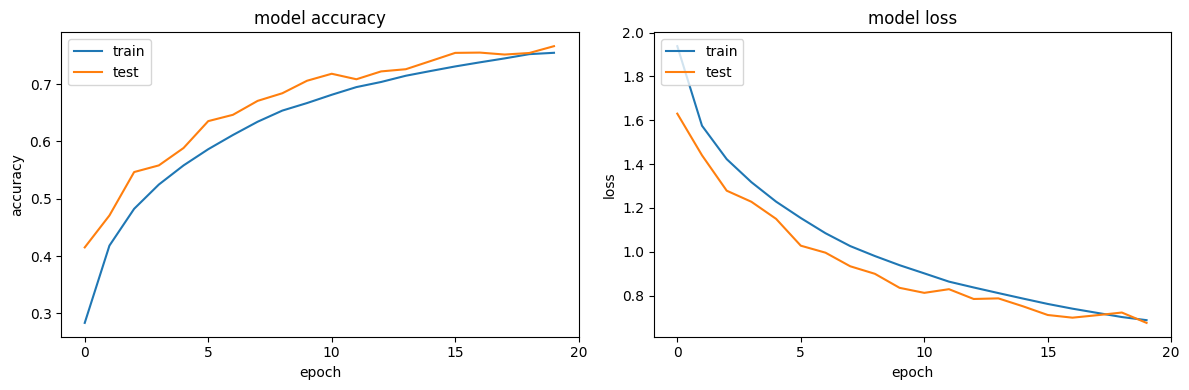

In [61]:
plot_results(model)

#### Comments on `Baseline with Dropout`

- The baseline model with dropout achieves **~77% accuracy**.
- Introducing dropout helped the model to continue improving until the last epochs. It seems that the model could benefit from increasing the number of epochs since the training loss does not flatten out completely.
- Also, the two losses seem to follow the same trajectory. 


## Make Predictions

In [16]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [17]:
y_pred = y_pred.argmax(axis=1)

## References

1. Krizhevsky, Alex. (2009). Learning Multiple Layers of Features from Tiny Images. University of Toronto. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
1. Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition. 3rd International Conference on Learning Representations, ICLR 2015 - Conference Track Proceedings. https://arxiv.org/abs/1409.1556v6
1. Brownlee, J. (2020). Deep Learning for Computer Vision Image Classification, Object Detection and Face Recognition in Python.